In [ ]:
#Zadanie 1
import pandas as pd
df = pd.read_excel('Lab6_data.xlsx')
df.head()

,DEPT [MD],VP [m/s],VSX [m/s],VSY [m/s],PAR1,PAR2,PAR3,PAR4,PAR5
0,1050.0,3055,1531,1573,49766683317413,1.490218e-07,88,8.917627e+12,1.629024e+10
1,1050.1,3034,1517,1552,51917976630989,1.447758e-07,98,-4.181219e+13,1.711206e+10
2,1050.2,3025,1510,1539,52937501416995,1.421186e-07,101,-2.550837e+13,1.750000e+10
3,1050.3,3016,1504,1526,53973542181495,1.395260e-07,105,-5.251573e+13,1.789574e+10
4,1050.4,3030,1498,1523,54823457877834,1.388839e-07,106,-6.034015e+14,1.809355e+10


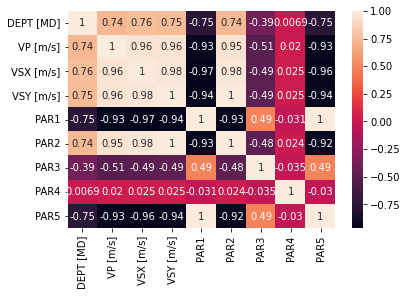

In [ ]:
#Zadanie 2
import seaborn as sb
sb.heatmap(df.corr(),annot=True)

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5501 entries, 0 to 5500
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DEPT [MD]  5501 non-null   float64
 1   VP [m/s]   5501 non-null   int64  
 2   VSX [m/s]  5501 non-null   int64  
 3   VSY [m/s]  5501 non-null   int64  
 4   PAR1       5501 non-null   int64  
 5   PAR2       5501 non-null   float64
 6   PAR3       5501 non-null   int64  
 7   PAR4       5501 non-null   float64
 8   PAR5       5501 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 386.9 KB


,DEPT [MD],VP [m/s],VSX [m/s],VSY [m/s],PAR1,PAR2,PAR3,PAR4,PAR5
count,5501.000000,5501.000000,5501.000000,5501.000000,5.501000e+03,5.501000e+03,5501.000000,5.501000e+03,5.501000e+03
mean,1325.000000,3438.722232,1778.546264,1806.961825,2.820698e+13,2.047514e-07,91.562261,-7.747425e+12,8.441844e+09
std,158.814625,218.656326,169.944724,172.490712,1.184023e+13,4.322203e-08,8.429687,4.695632e+14,4.025102e+09
min,1050.000000,2922.000000,1411.000000,1429.000000,7.239360e+12,1.208362e-07,71.000000,-1.119341e+16,1.755848e+09
25%,1187.500000,3253.000000,1627.000000,1660.000000,1.818570e+13,1.678445e-07,85.000000,-2.647683e+13,5.083176e+09
50%,1325.000000,3439.000000,1768.000000,1807.000000,2.602817e+13,2.021725e-07,92.000000,-8.689318e+11,7.557726e+09
75%,1462.500000,3600.000000,1911.000000,1929.000000,3.794837e+13,2.335539e-07,98.000000,2.496423e+13,1.167083e+10
max,1600.000000,4123.000000,2319.000000,2389.000000,7.163776e+13,3.742931e-07,114.000000,9.500925e+15,2.373683e+10


In [ ]:
df.dtypes

DEPT [MD]    float64
VP [m/s]       int64
VSX [m/s]      int64
VSY [m/s]      int64
PAR1           int64
PAR2         float64
PAR3           int64
PAR4         float64
PAR5         float64
dtype: object

Wszystkie zmienne są numeryczne. 

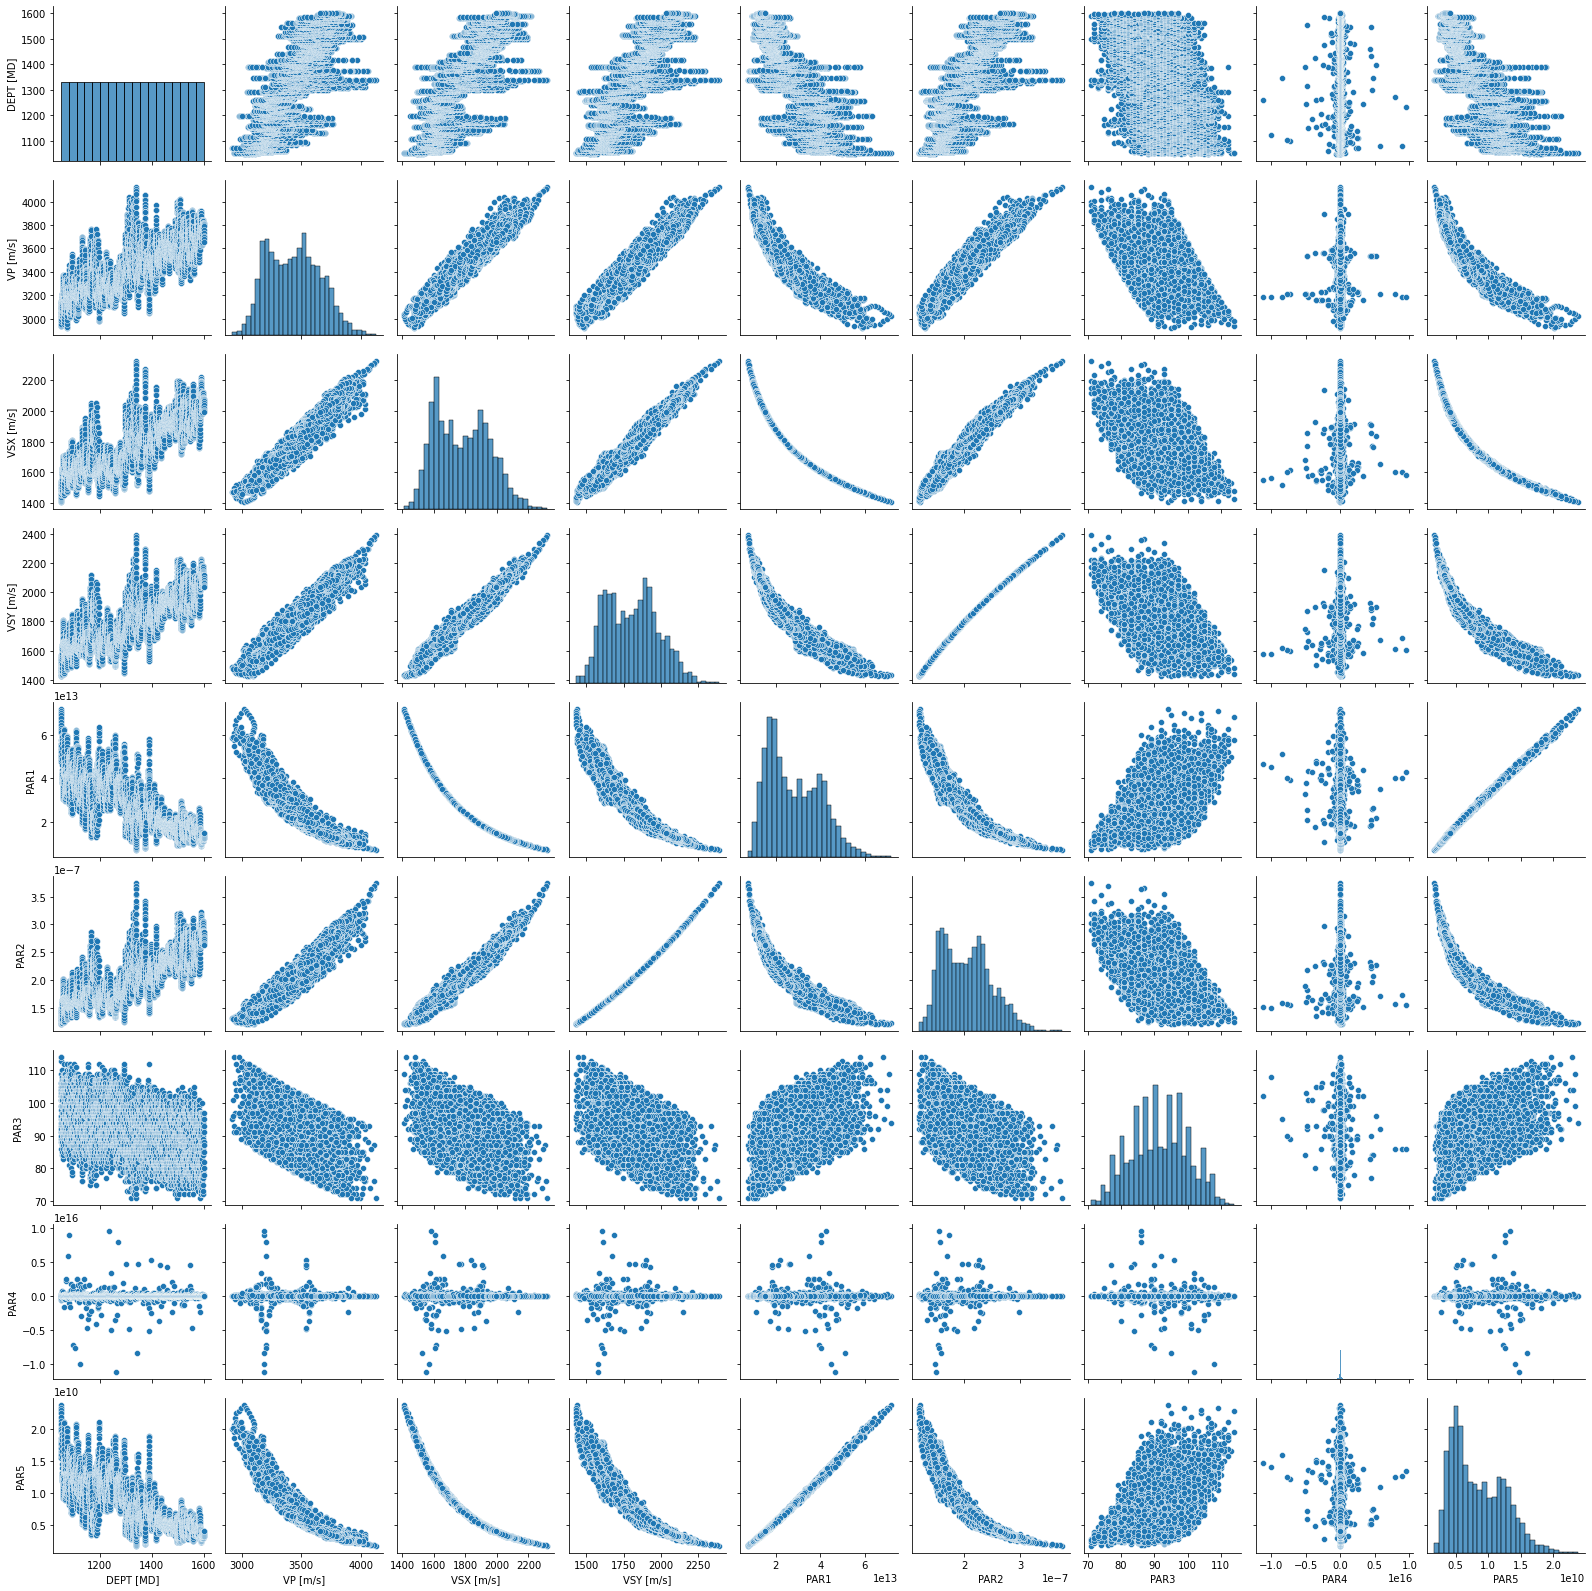

In [ ]:
sb.pairplot(df)

Z dalszej analizy można wykluczyć zmienne VSX i VSY(ze względu na ich wysoką wzajemną korelację), PAR5 (całkowita korelacja z PAR1 oraz wysoka z PAR2), PAR1 (wysoka korelacja z PAR2) oraz PAR4 (korelacja z VS bliska do zera).<br>
Do modelu użyję zmiennej PAR2, gdyz jest on bardziej skorelowany z VP niż PAR3.

In [ ]:
#Zadanie 3
df=df.drop(columns=['VSX [m/s]','VSY [m/s]','PAR1', 'PAR4','PAR5'])
df.head()

,DEPT [MD],VP [m/s],PAR2,PAR3
0,1050.0,3055,1.490218e-07,88
1,1050.1,3034,1.447758e-07,98
2,1050.2,3025,1.421186e-07,101
3,1050.3,3016,1.395260e-07,105
4,1050.4,3030,1.388839e-07,106


Następnie wykonam standaryzacje danych, nie pomijając przy tym kolumnę DEPT (ze względu na to, że jest ona używana jedynie do wizualizacji danych).

In [ ]:
from sklearn.preprocessing import StandardScaler

scale= StandardScaler()
scaled_data=scale.fit_transform(df[['PAR2','PAR3']])
scaled_data=pd.DataFrame(scaled_data)
df['PAR2']=scaled_data[0]
df['PAR3']=scaled_data[1]
df.head()

,DEPT [MD],VP [m/s],PAR2,PAR3
0,1050.0,3055,-1.289495,-0.422624
1,1050.1,3034,-1.387741,0.763768
2,1050.2,3025,-1.449224,1.119685
3,1050.3,3016,-1.509213,1.594242
4,1050.4,3030,-1.524071,1.712881


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y=df['VP [m/s]']
col_names=['PAR2']
x=df[col_names]
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

LR=LinearRegression()
LR.fit(X_train,y_train)
PredTest=LR.predict(X_test)
LR.score(X_test,y_test)

0.9071606144080658

Score określa w jakim stopniu model jest dokładny, w skali od 0 do 100%. Model osiagnął wartość 90% co jest wysokim wynikiem. 

In [ ]:
LR.coef_

array([208.49040296])

In [ ]:
LR.intercept_

3437.78370022611

Text(0.5, 1.0, 'Linear Regression')

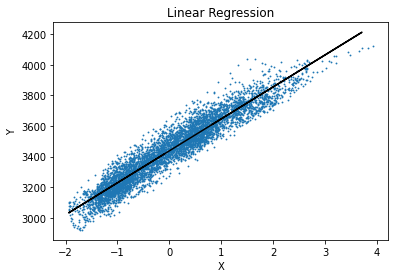

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X_test, PredTest, color='k')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x, y, s=0.7)
plt.title("Linear Regression")

Text(0.5, 0.98, 'Actual values vs predicted')

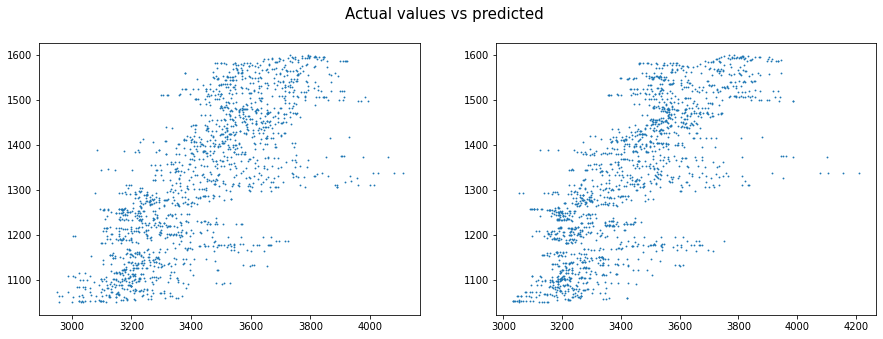

In [ ]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(y_test, df['DEPT [MD]'].iloc[X_test.index].values, s=0.7)
ax2.scatter(PredTest, df['DEPT [MD]'].iloc[X_test.index].values, s=0.7)
fig.suptitle('Actual values vs predicted', fontsize=15, color='k')

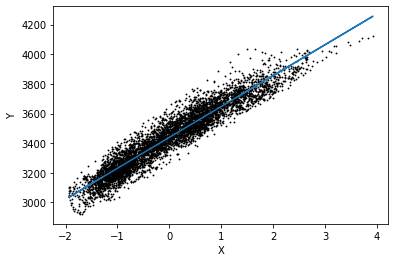

In [ ]:
#Zadanie 4
#Założenie o liniowości
import numpy as np
plt.scatter(x, y, color='k', s=0.7)
plt.xlabel('X')
plt.ylabel('Y')
c, i = np.polyfit(x['PAR2'], y, 1)
plt.plot(x, c*x+i)

In [ ]:
df.corr()['VP [m/s]']

DEPT [MD]    0.735387
VP [m/s]     1.000000
PAR2         0.953744
PAR3        -0.513735
Name: VP [m/s], dtype: float64

Z wykresu oraz wartości korelacji wynika, że istnieje zależność liniowa między tymi zmiennymi.

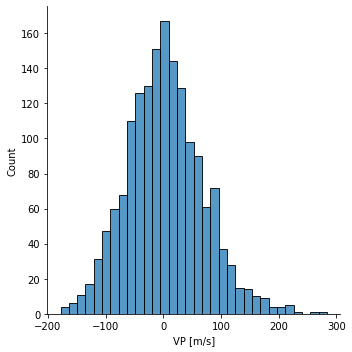

In [ ]:
#Rozkład normalny blędów
residual=y_test-PredTest
sb.displot(residual)

Na podstawie wykresu można stwierdzić, że rozkład błędów jest normalny.

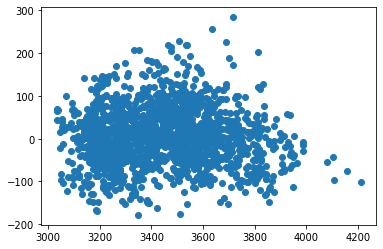

In [ ]:
#Homoskedastyczność
plt.scatter(PredTest,residual)
plt.show()

Na podstawie wykresu można stwierdzić, że została spełniona.<br>
Zostały spełnione założenia dla modelu.<br><br>
Zadanie 5 <br>

In [ ]:
col_names=['PAR2','PAR3']
for i in col_names:
    magnitude = np.sqrt(df[i].dot(df[i]))   
    print('{0}: {1}'.format(i,magnitude)) 

PAR2: 74.16872656315465
PAR3: 74.16872656315459


Dzięki standaryzacji danych obie zmienne mają taką samą magnitudę.

In [ ]:
x=df[col_names]
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

LR=LinearRegression()
LR.fit(X_train,y_train)
PredTest=LR.predict(X_test)
LR.score(X_test,y_test)

0.9118702946841842

Zadanie 6<br>
Model uzyskał wynik 91%, co jest dobrym wynikiem (jest on dokładny w 91%).

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


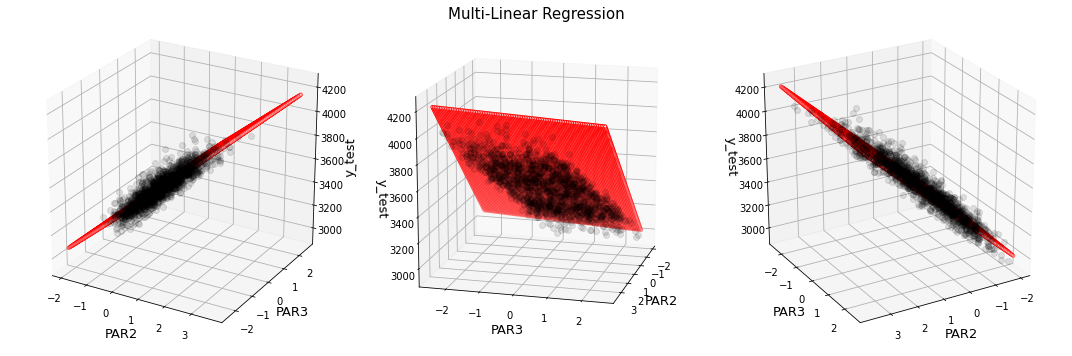

In [ ]:
fig = plt.figure(figsize=(15, 5))

x_pred = np.linspace(X_test[col_names[0]].min(), X_test[col_names[0]].max(),100)   
y_pred = np.linspace(X_test[col_names[1]].min(),  X_test[col_names[1]].max(), 100)  
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
predicted = LR.predict(model_viz)

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')
axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(X_test[col_names[0]], X_test[col_names[1]], y_test,color='k', linestyle='none',zorder=15,marker='o', alpha=0.1)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor='white', s=10, edgecolor='red')
    ax.set_xlabel(col_names[0],fontsize=13)
    ax.set_ylabel(col_names[1], fontsize=13)
    ax.set_zlabel('y_test', fontsize=13)

ax1.view_init(elev=25, azim=-60)
ax2.view_init(elev=15, azim=15)
ax3.view_init(elev=25, azim=60)
fig.suptitle('Multi-Linear Regression', fontsize=15, color='k')
fig.tight_layout()

Text(0.5, 0.98, 'Actual values vs predicted')

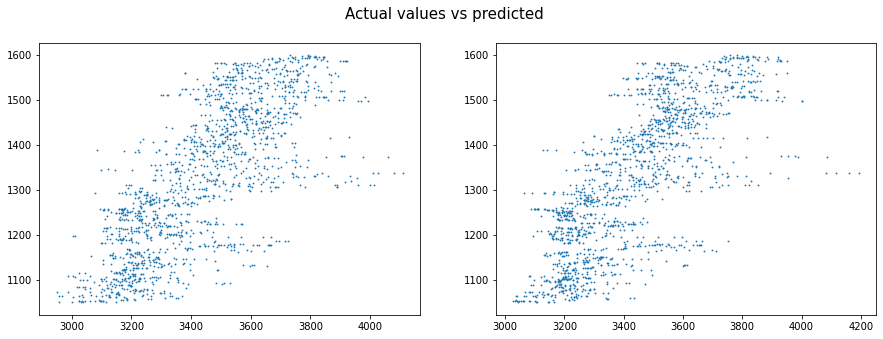

In [ ]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(y_test, df['DEPT [MD]'].iloc[X_test.index].values, s=0.7)
ax2.scatter(PredTest, df['DEPT [MD]'].iloc[X_test.index].values, s=0.7)
fig.suptitle('Actual values vs predicted', fontsize=15, color='k')

Zadanie 7<br>
Dla modelu regresji liniowej otrzymaliśmy score 90%, a dla regresji wielorakiej 91%. Oznacza to, że drugi model jest dokładny aż w 91% co jest lepszym wynikiem niż 90% otrzymane dla modelu pierwszego. Mimo to wybrałabym model liniowy z użyciem PAR2 jako model produkcyjny. Drugi model może mieć lepszy wynik, ale nie jest to duża różnica, co oznacza, że PAR3 nie ma aż takiego wpływu na wynik. Dodatkowa obecność PAR3 (zamiast samego PAR2) skomplikowałaby bardziej model (co powinno się unikać), a nie dałaby znacznie lepszego wyniku.